In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape  #to find rows and cols in the dataset

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#to check the datatype of each col:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
#PRE PROCESSING

In [8]:
#null value check:       (our dataset does not have any null value)
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#deleting irrelevant cols   (delete Customer ID)
df.drop(["CustomerID"], axis=1, inplace=True)    #axis=1, bcz col

In [10]:
df.head()  #now CustomerID col has been removed

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
#ANALYSIS AND VISUALIZATION OF DATA

C:\Users\FCUKUP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FCUKUP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FCUKUP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

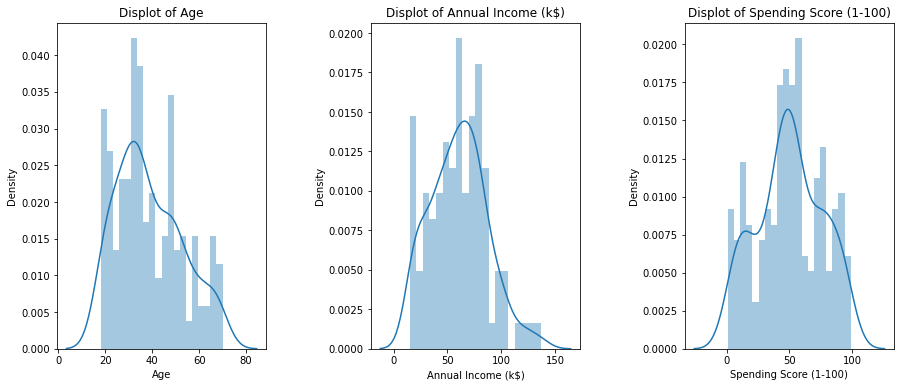

In [12]:
# represent graph for 3 cols- age, AI, SS. (Density graph made- distribution)
plt.figure(1, figsize=(15,6)) #plot dimensions in inches(15,6) big figure
n=0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n) #row,col,plotno. (3 plots of 3 cols) inner 3 figs
    plt.subplots_adjust(hspace=0.5,wspace=0.5) #space between subplots
    sns.distplot(df[x],bins=20)  #depicts the variation in the data distribution.
    plt.title('Displot of {}' .format(x))
plt.show()
    
    

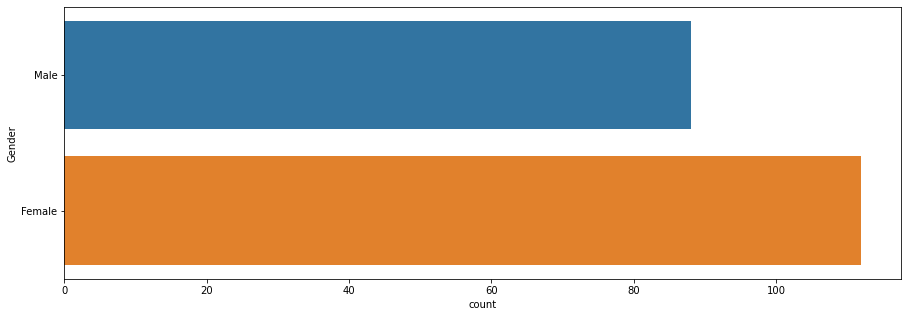

In [13]:
#comparison between no of males and females
#because they cannot be shown in dstribution
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df) #show the counts of observations in each categorical bin using bars
plt.show()

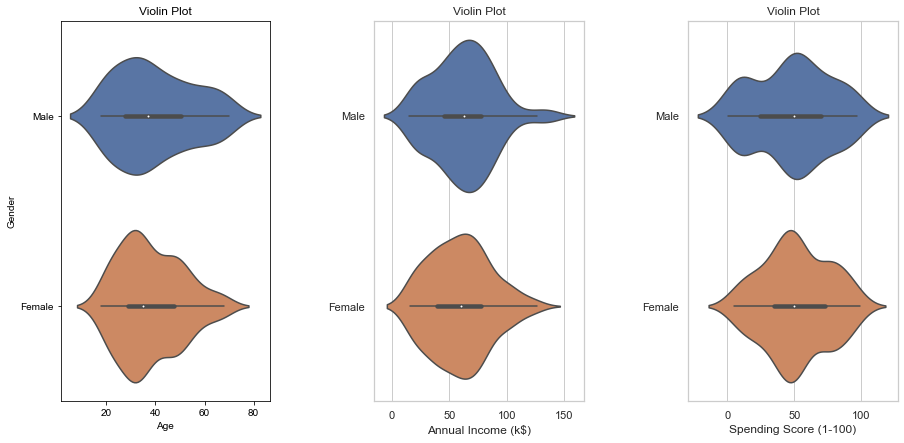

In [14]:
# represntion of violin distribution cols on the basis of gender
#x axis->age, ai,ss
#y axis->gender
plt.figure(1, figsize=(15,7)) #plot dimensions in inches(15,6) big figure
n=0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n) #row,col,plotno. (3 plots of 3 cols) inner 3 figs
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5) #space between subplots
    sns.violinplot(x=cols , y='Gender' , data=df) #depicts the variation in the data distribution.
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

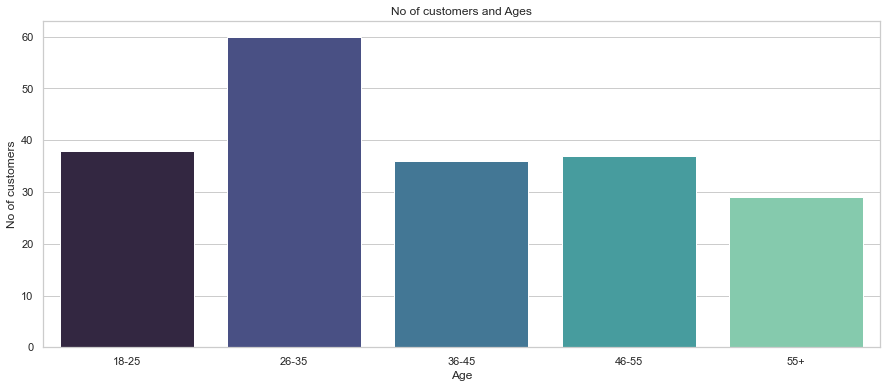

In [15]:
#divide age into diff categories and then visualise data which age range has higher no of customers
# check from df.describe()- min age- 18, max age- 70

age_18_25= df.Age[(df.Age >=18) & (df.Age <=25)]   #age groups made (categories)
age_26_35= df.Age[(df.Age >=26) & (df.Age <=35)]
age_36_45= df.Age[(df.Age >=36) & (df.Age <=45)]
age_46_55= df.Age[(df.Age >=46) & (df.Age <=55)]
age_55above= df.Age[(df.Age >=56)]

agex= ["18-25","26-35", "36-45", "46-55", "55+"]  # eg) 18-25 bars made on graph
agey= [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]
#length of customers in that age range (count)

#for visiualization :

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y= agey, palette="mako") #mako- for color palette
plt.title("No of customers and Ages")
plt.xlabel("Age")
plt.ylabel("No of customers")
plt.show()

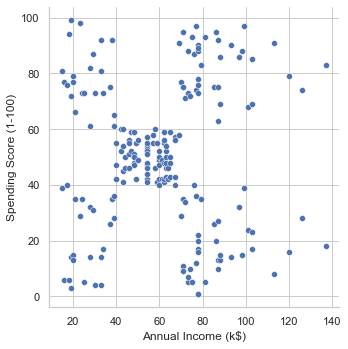

In [16]:
#relationship b/w AI ans SS
sns.relplot(x="Annual Income (k$)", y= "Spending Score (1-100)", data=df )  #Figure-level interface for drawing relational plots onto a FacetGrid.

#from the graph below- we find 40-60 AI range have SS of 40-60 whereas, we do not have a definte relation for rest of the AI ranges.

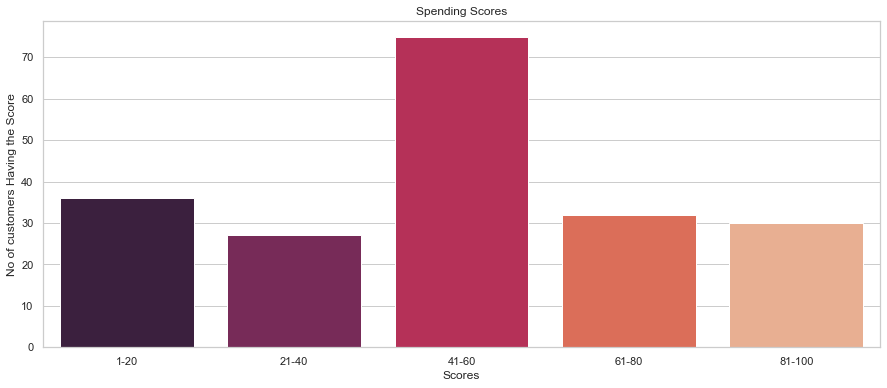

In [17]:
#divide SS into categoties (like we did for age)
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <=20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21) & (df["Spending Score (1-100)"] <=40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=41) & (df["Spending Score (1-100)"] <=60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=61) & (df["Spending Score (1-100)"] <=80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=81) & (df["Spending Score (1-100)"] <=100)]

ssx= ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy= [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y= ssy, palette="rocket") 
plt.title("Spending Scores")
plt.xlabel("Scores")
plt.ylabel("No of customers Having the Score")
plt.show()


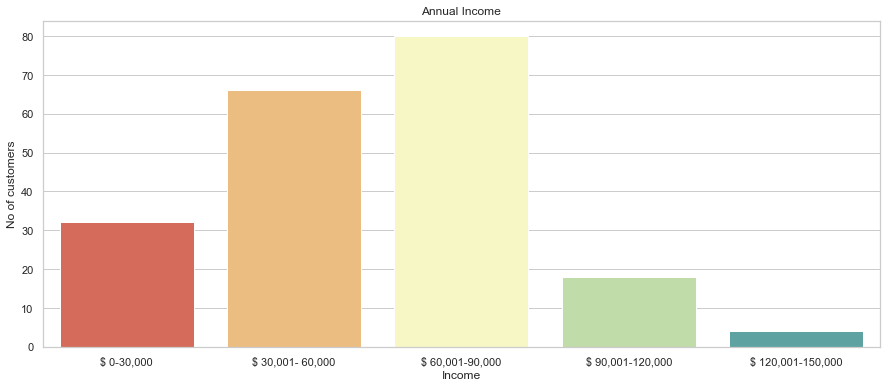

In [18]:
#divides Annual Income into categories 

ai_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=0) & (df["Annual Income (k$)"] <=30)]
ai_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=31) & (df["Annual Income (k$)"] <=60)]
ai_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=61) & (df["Annual Income (k$)"] <=90)]
ai_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=91) & (df["Annual Income (k$)"] <=120)]
ai_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=121) & (df["Annual Income (k$)"] <=150)]

aix= ["$ 0-30,000", "$ 30,001- 60,000", "$ 60,001-90,000", "$ 90,001-120,000", "$ 120,001-150,000"]
aiy= [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y= aiy, palette="Spectral") 
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("No of customers")
plt.show()

#conclusion- most of our customers in 60,001-90,000

In [19]:
#CLUSTERING

In [20]:
#1) Initialization of k (elbow method)

C:\Users\FCUKUP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


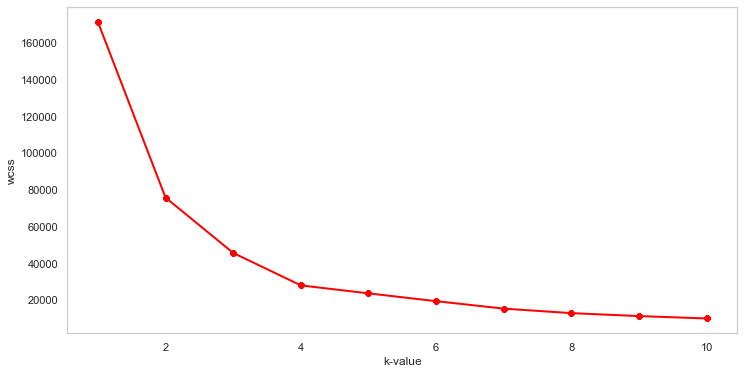

In [21]:
#relationship b/w age and ss and cluster data acc. (Clustering based on age and SS)

X1= df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
#optimal range of custers 1-11(considered)
wcss=[]
#within cluster sum of squares method to find k(elbow wala)
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k-value")
plt.ylabel("wcss")
plt.show()


In [22]:
# we select 4 as elbow curve there after that it is constant
kmeans= KMeans(n_clusters=4)

label=kmeans.fit_predict(X1)
print(label)

#harek dataset point ke liye cluster number aagya 
#cluster numbers(0,1,2,3)as k=4

[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [23]:
print(kmeans.cluster_centers_)
#centroids of each cluster (x,y)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


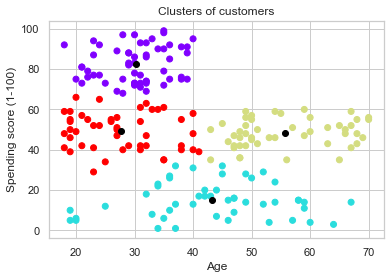

In [24]:
#visualising clusters on graph
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')  #cluster colors, c contains all the labels defined above
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')  #centroid color, centers plotted
plt.title("Clusters of customers")
plt.xlabel("Age")
plt.ylabel("Spending score (1-100)")
plt.show()

Clusters of AI and SS:

C:\Users\FCUKUP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


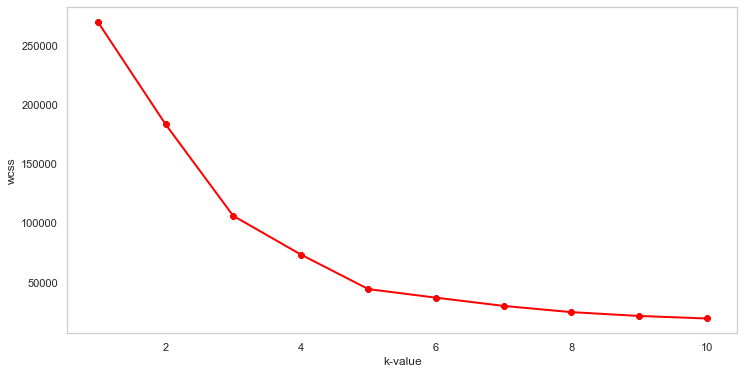

In [25]:
X2= df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
#optimal range of custers 1-11(considered)
wcss=[]
#within cluster sum of squares method to find k(elbow wala)
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k-value")
plt.ylabel("wcss")
plt.show()

elbow at 5, hence k=5 to be used

In [26]:
kmeans= KMeans(n_clusters=5)

label=kmeans.fit_predict(X2)
print(label)

#4 clusters formed- (0,1,2,3,4)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 3 0 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 4 2 3 2 4 2 4 2 3 2 4 2 4 2 4 2 4 2 3 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [27]:
print(kmeans.cluster_centers_)
#centroids of each cluster (x,y)

[[26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]]


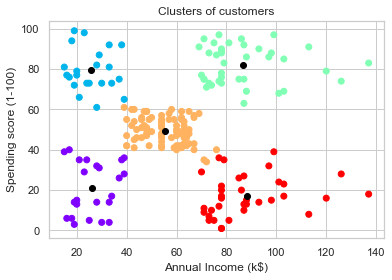

In [28]:
#visualising clusters on graph
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')  #cluster colors, c contains all the labels defined above
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')  #centroid color, centers plotted
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending score (1-100)")
plt.show()

Now considering all 3 cols together- age, AI, SS

C:\Users\FCUKUP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


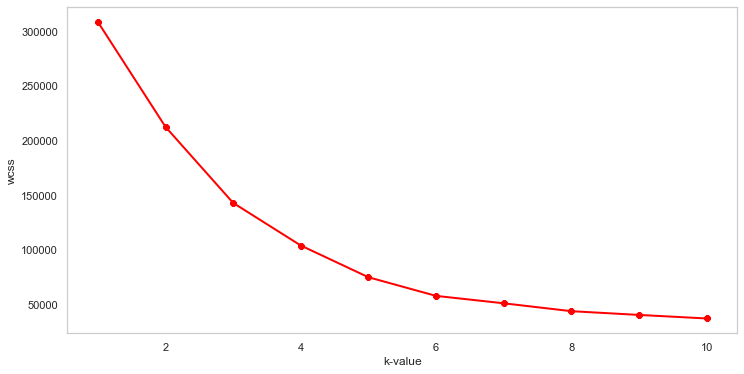

In [29]:
X3= df.iloc[:, 1:].values #[:,1:] taken because last 3 cols only as 0th col is gender

from sklearn.cluster import KMeans
#optimal range of custers 1-11(considered)
wcss=[]
#within cluster sum of squares method to find k(elbow wala)
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k-value")
plt.ylabel("wcss")
plt.show()

elbow at 5, hence k=5 chosen

In [30]:
kmeans= KMeans(n_clusters=5)

label=kmeans.fit_predict(X3)
print(label)

#4 clusters formed- (0,1,2,3,4)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [31]:
print(kmeans.cluster_centers_)
#centroids of each cluster (x,y,z)- 3 coordinates bcz age, AI and SS all 3 taken

[[43.08860759 55.29113924 49.56962025]
 [45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]]


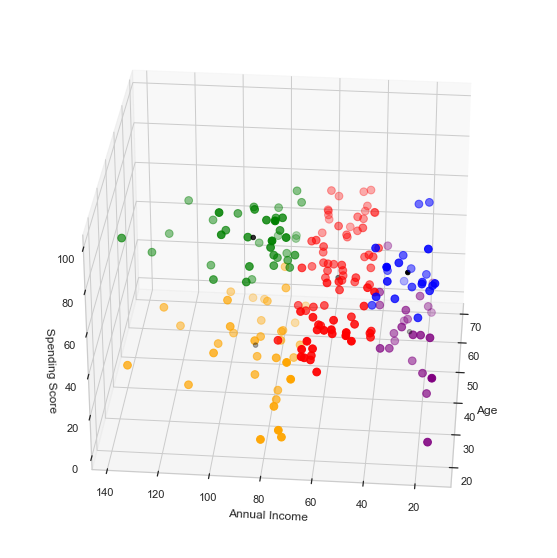

In [32]:
#visualising clusters on graph, since 3 cols involved we can't use upar vala same code, we need to make 3-D graph this time.

clusters=kmeans.fit_predict(X3)
df["label"]=clusters

from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(20,10))

ax= fig.add_subplot(111,projection='3d')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], color='black')
#label==0, means 0th cluster, represnted by color blue, lly rest of the clusters.
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label ==0], df["Spending Score (1-100)"][df.label ==0], c='blue',s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label ==1], df["Spending Score (1-100)"][df.label ==1], c='red',s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label ==2], df["Spending Score (1-100)"][df.label ==2], c='green',s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label ==3], df["Spending Score (1-100)"][df.label ==3], c='orange',s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label ==4], df["Spending Score (1-100)"][df.label ==4], c='purple',s=60)

ax.view_init(30,185)

plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()

